In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.core.frame import DataFrame

In [5]:
import os
path="/Users/rvickyw/Desktop/MasterClass/北京房价/code"
os.chdir(path)
print(os.getcwd())

/Users/rvickyw/Desktop/Business Analytics/MasterClass/北京房价/code


In [6]:
# import excel
data=pd.read_excel('Beijing Project.xlsx')

# Data Description

In [7]:
#column names
columns=list(data.columns.values)
print(columns)

['URL', 'TotalPrice', 'UnitPrice', 'Followers', 'Bedroom', 'Livingroom', 'Kitchen', 'Bathroom', 'Square', 'TotalFloor', 'TradeTime', 'ConstructionTime', 'BulidingOrientation', 'RenovationCondition', 'HeatingMethod', 'Floor', 'HouseStructure', 'Building', 'Elevator/Stairs', 'Householder(per floor)', 'Elevator', 'TradingOwnership', 'FiveYearsProperty', 'Mortgage', 'BuildingType', 'UsageType', 'PropertyRights', 'District', 'RingRoad', 'Nearest TR Distance(m)']


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38892 entries, 0 to 38891
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   URL                     38892 non-null  object        
 1   TotalPrice              38892 non-null  float64       
 2   UnitPrice               38892 non-null  int64         
 3   Followers               38892 non-null  int64         
 4   Bedroom                 38892 non-null  int64         
 5   Livingroom              38892 non-null  int64         
 6   Kitchen                 38892 non-null  int64         
 7   Bathroom                38892 non-null  int64         
 8   Square                  38892 non-null  float64       
 9   TotalFloor              38892 non-null  int64         
 10  TradeTime               38892 non-null  datetime64[ns]
 11  ConstructionTime        38029 non-null  float64       
 12  BulidingOrientation     38892 non-null  object

In [6]:
data.shape

(38892, 30)

In [7]:
# Null Value
data.isna().sum(axis=0)

URL                          0
TotalPrice                   0
UnitPrice                    0
Followers                    0
Bedroom                      0
Livingroom                   0
Kitchen                      0
Bathroom                     0
Square                       0
TotalFloor                   0
TradeTime                    0
ConstructionTime           863
BulidingOrientation          0
RenovationCondition          0
HeatingMethod              198
Floor                      359
HouseStructure            1024
Building                    42
Elevator/Stairs              0
Householder(per floor)       0
Elevator                  1263
TradingOwnership             0
FiveYearsProperty           19
Mortgage                    74
BuildingType               637
UsageType                    0
PropertyRights               0
District                     0
RingRoad                  3452
Nearest TR Distance(m)       0
dtype: int64

In [8]:
data.describe() # Numerical data description

,TotalPrice,UnitPrice,Followers,Bedroom,Livingroom,Kitchen,Bathroom,Square,TotalFloor,ConstructionTime,Elevator/Stairs,Householder(per floor),Elevator,FiveYearsProperty,Mortgage,PropertyRights
count,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38029.000000,38892.000000,38892.000000,37629.000000,38873.000000,38818.000000,38892.000000
mean,605.159310,61566.254345,42.998072,2.431554,1.291860,1.005965,1.405585,103.524594,11.294791,2001.743853,1.450427,4.113468,0.541471,0.714275,0.284791,0.104674
std,523.915335,35486.984844,73.125357,1.008829,0.569919,0.116144,0.766013,67.918757,7.316669,17.867651,0.814227,4.801874,0.498284,0.451765,0.451320,0.306137
min,74.000000,9946.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.100000,0.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,299.000000,35620.750000,7.000000,2.000000,1.000000,1.000000,1.000000,63.807500,6.000000,1996.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,450.000000,49781.500000,21.000000,2.000000,1.000000,1.000000,1.000000,87.510000,7.000000,2004.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000
75%,732.250000,79846.500000,51.000000,3.000000,2.000000,1.000000,2.000000,118.687500,16.000000,2010.000000,2.000000,4.000000,1.000000,1.000000,1.000000,0.000000
max,12000.000000,180000.000000,4535.000000,12.000000,8.000000,8.000000,11.000000,2323.870000,45.000000,2106.000000,20.000000,98.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Categorical data description
data[data.columns[data.dtypes=="object"]].describe()

,URL,BulidingOrientation,RenovationCondition,HeatingMethod,Floor,HouseStructure,Building,TradingOwnership,BuildingType,UsageType,District,RingRoad,Nearest TR Distance(m)
count,38892,38892,38892,38694,38533,37868,38850,38892,38255,38892,38892,35440,38892
unique,31634,8,4,2,5,4,5,8,4,7,17,6,5
top,https://bj.lianjia.com/ershoufang/101112222188...,S,deluxe,central,middle,flat_layer,steel_concrete,Commercial housing,Plate,Average house,chaoyang,e,VF
freq,6,27955,18511,32007,12813,33255,38506,29680,27222,38377,4687,12485,15779


In [10]:
# Find the duplication
data.loc[:,'URL'].value_counts()

https://bj.lianjia.com/ershoufang/101112222188.html    6
https://bj.lianjia.com/ershoufang/101110488521.html    6
https://bj.lianjia.com/ershoufang/101112994732.html    5
https://bj.lianjia.com/ershoufang/101112822687.html    5
https://bj.lianjia.com/ershoufang/101113409444.html    5
                                                      ..
https://bj.lianjia.com/ershoufang/101113196187.html    1
https://bj.lianjia.com/ershoufang/101113195214.html    1
https://bj.lianjia.com/ershoufang/101113194818.html    1
https://bj.lianjia.com/ershoufang/101113194731.html    1
https://bj.lianjia.com/ershoufang/101112002639.html    1
Name: URL, Length: 31634, dtype: int64

In [11]:
# Drop duplication
data.drop_duplicates(subset='URL', keep='first',inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31634 entries, 0 to 38891
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   URL                     31634 non-null  object        
 1   TotalPrice              31634 non-null  float64       
 2   UnitPrice               31634 non-null  int64         
 3   Followers               31634 non-null  int64         
 4   Bedroom                 31634 non-null  int64         
 5   Livingroom              31634 non-null  int64         
 6   Kitchen                 31634 non-null  int64         
 7   Bathroom                31634 non-null  int64         
 8   Square                  31634 non-null  float64       
 9   TotalFloor              31634 non-null  int64         
 10  TradeTime               31634 non-null  datetime64[ns]
 11  ConstructionTime        30854 non-null  float64       
 12  BulidingOrientation     31634 non-null  object

In [13]:
#drop useless columns
data.drop(columns='URL', inplace=True) 
data.drop(columns='FiveYearsProperty', inplace=True)
data.drop(columns='Mortgage', inplace=True)
data.drop(columns='PropertyRights', inplace=True)
data.drop(columns='Followers', inplace=True)
data.drop(columns='TradeTime', inplace=True)

In [14]:
# data type
print(data.dtypes)

TotalPrice                float64
UnitPrice                   int64
Bedroom                     int64
Livingroom                  int64
Kitchen                     int64
Bathroom                    int64
Square                    float64
TotalFloor                  int64
ConstructionTime          float64
BulidingOrientation        object
RenovationCondition        object
HeatingMethod              object
Floor                      object
HouseStructure             object
Building                   object
Elevator/Stairs             int64
Householder(per floor)      int64
Elevator                  float64
TradingOwnership           object
BuildingType               object
UsageType                  object
District                   object
RingRoad                   object
Nearest TR Distance(m)     object
dtype: object


In [15]:
#check null values proportion
data.isnull().sum()
data.isnull().sum()/data.shape[0]

TotalPrice                0.000000
UnitPrice                 0.000000
Bedroom                   0.000000
Livingroom                0.000000
Kitchen                   0.000000
Bathroom                  0.000000
Square                    0.000000
TotalFloor                0.000000
ConstructionTime          0.024657
BulidingOrientation       0.000000
RenovationCondition       0.000000
HeatingMethod             0.005532
Floor                     0.008662
HouseStructure            0.027850
Building                  0.001138
Elevator/Stairs           0.000000
Householder(per floor)    0.000000
Elevator                  0.035721
TradingOwnership          0.000000
BuildingType              0.018335
UsageType                 0.000000
District                  0.000000
RingRoad                  0.093570
Nearest TR Distance(m)    0.000000
dtype: float64

In [16]:
data.isnull().sum()

TotalPrice                   0
UnitPrice                    0
Bedroom                      0
Livingroom                   0
Kitchen                      0
Bathroom                     0
Square                       0
TotalFloor                   0
ConstructionTime           780
BulidingOrientation          0
RenovationCondition          0
HeatingMethod              175
Floor                      274
HouseStructure             881
Building                    36
Elevator/Stairs              0
Householder(per floor)       0
Elevator                  1130
TradingOwnership             0
BuildingType               580
UsageType                    0
District                     0
RingRoad                  2960
Nearest TR Distance(m)       0
dtype: int64

In [17]:
#delete null values
data.loc[data.isnull().any(axis=1)]
drop_index=data.loc[data.isnull().any(axis=1)].index
data=data.drop(labels=drop_index, axis=0)

In [18]:
data.drop(columns='HeatingMethod', inplace=True)
data.drop(columns='HouseStructure', inplace=True)
data.drop(columns='Building', inplace=True)
data.drop(columns='UsageType', inplace=True)

# Outliers

In [172]:
#change the form of ConstructionTime
data.ConstructionTime=2021-data.ConstructionTime

In [173]:
data.ConstructionTime.unique()

array([], dtype=float64)

In [169]:
error=data[(data.ConstructionTime>100)|(data.ConstructionTime<0)].index

In [170]:
data.drop(index=error,inplace=True)

In [171]:
# Elevator/Stairs
data['Elevator/Stairs'].unique()

array([], dtype=int64)

In [24]:
data[(data['Elevator/Stairs']==12)|(data['Elevator/Stairs']==18)|(data['Elevator/Stairs']==20)]

,TotalPrice,UnitPrice,Bedroom,Livingroom,Kitchen,Bathroom,Square,TotalFloor,ConstructionTime,BulidingOrientation,RenovationCondition,Floor,Elevator/Stairs,Householder(per floor),Elevator,TradingOwnership,BuildingType,District,RingRoad,Nearest TR Distance(m)
8459,228.0,20219,3,1,1,2,112.77,10,5.0,S,other,low,18,2,1.0,Commercial housing,Plate,miyun,f,VF
17077,265.0,22173,3,2,1,2,119.52,10,5.0,S,other,middle,18,2,1.0,Commercial housing,Plate,miyun,f,VF
22276,2388.0,78927,5,2,1,3,302.56,5,7.0,S,deluxe,bottom,20,2,1.0,Commercial housing,Plate,daxing,e,VF
31058,198.0,47838,1,0,1,1,41.39,16,6.0,S,deluxe,middle,12,8,1.0,Commercial housing,Combination of plate and tower,tongzhou,e,M


In [25]:
error2=data[(data['Elevator/Stairs']==18)|(data['Elevator/Stairs']==20)].index

In [26]:
data.drop(index=error2,inplace=True)

In [27]:
data['Elevator/Stairs'].unique()

array([ 2,  1,  3,  8,  4,  5,  7,  6,  9, 10, 12])

In [28]:
import seaborn as sns

In [29]:
ElevatorRatio=data['Householder(per floor)']/data['Elevator/Stairs']
ElevatorRatio.head()

0    4.0
1    0.5
3    4.0
6    3.0
7    3.0
dtype: float64

/Users/rvickyw/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

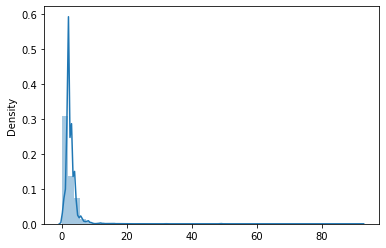

In [30]:
sns.distplot(ElevatorRatio)

In [31]:
ElevatorRatio.describe()

count    26391.000000
mean         2.752264
std          2.353263
min          0.166667
25%          2.000000
50%          2.000000
75%          3.000000
max         92.000000
dtype: float64

In [32]:
ElevatorRatio[ElevatorRatio>20].count()

50

In [33]:
elevator_error=data[(data['Householder(per floor)']/data['Elevator/Stairs'])>20].index

In [34]:
data.drop(index=elevator_error,inplace=True)

In [35]:
# Householder(per floor)
data['Householder(per floor)'].unique()

array([ 8,  1,  6,  3,  5,  2, 12,  7,  9,  4, 11, 14, 22, 18, 24, 15, 13,
       16, 25, 17, 34, 42, 31, 19, 29, 26, 33, 39, 21, 23, 27, 36, 38, 68,
       37, 28, 35, 62, 59, 41, 88, 32, 51])

In [36]:
data[data['Householder(per floor)']>60]

,TotalPrice,UnitPrice,Bedroom,Livingroom,Kitchen,Bathroom,Square,TotalFloor,ConstructionTime,BulidingOrientation,RenovationCondition,Floor,Elevator/Stairs,Householder(per floor),Elevator,TradingOwnership,BuildingType,District,RingRoad,Nearest TR Distance(m)
2664,190.0,65904,1,0,1,1,28.83,11,16.0,W,simple,middle,4,68,1.0,Commercial housing,Combination of plate and tower,shunyi,e,M
2715,228.0,46664,1,1,1,1,48.86,11,16.0,W,simple,middle,4,68,1.0,Commercial housing,Combination of plate and tower,shunyi,e,M
3229,220.0,50194,1,0,1,1,43.83,11,16.0,W,deluxe,low,4,68,1.0,Commercial housing,Combination of plate and tower,shunyi,e,M
3251,186.0,57443,1,0,1,1,32.38,11,16.0,W,deluxe,middle,4,68,1.0,Commercial housing,Combination of plate and tower,shunyi,e,M
28214,399.0,96798,1,1,1,1,41.22,17,30.0,S,deluxe,middle,8,62,1.0,Central delivery room,Tower,haidian,b,M
28418,410.0,96019,1,1,1,1,42.70,17,29.0,S,deluxe,middle,8,62,1.0,Commercial housing,Tower,haidian,b,M
33408,980.0,73629,3,1,1,2,133.10,15,23.0,EN,simple,high,6,88,1.0,Private property,Combination of plate and tower,haidian,d,M
36892,195.0,61495,1,0,1,1,31.71,11,16.0,E,deluxe,top,4,68,1.0,Commercial housing,Combination of plate and tower,shunyi,e,M
37577,240.0,40255,1,1,1,1,59.62,11,16.0,E,deluxe,middle,4,68,1.0,Commercial housing,Combination of plate and tower,shunyi,e,M
37578,245.0,41094,1,1,1,1,59.62,11,16.0,E,simple,middle,4,68,1.0,Commercial housing,Combination of plate and tower,shunyi,e,M


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26341 entries, 0 to 38890
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TotalPrice              26341 non-null  float64
 1   UnitPrice               26341 non-null  int64  
 2   Bedroom                 26341 non-null  int64  
 3   Livingroom              26341 non-null  int64  
 4   Kitchen                 26341 non-null  int64  
 5   Bathroom                26341 non-null  int64  
 6   Square                  26341 non-null  float64
 7   TotalFloor              26341 non-null  int64  
 8   ConstructionTime        26341 non-null  float64
 9   BulidingOrientation     26341 non-null  object 
 10  RenovationCondition     26341 non-null  object 
 11  Floor                   26341 non-null  object 
 12  Elevator/Stairs         26341 non-null  int64  
 13  Householder(per floor)  26341 non-null  int64  
 14  Elevator                26341 non-null

In [38]:
# Numerical data describe
data.describe()

,TotalPrice,UnitPrice,Bedroom,Livingroom,Kitchen,Bathroom,Square,TotalFloor,ConstructionTime,Elevator/Stairs,Householder(per floor),Elevator
count,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000
mean,603.702832,61940.171634,2.416081,1.275958,1.004632,1.384799,101.897983,11.264796,20.634372,1.447743,3.990471,0.531301
std,504.246412,34152.044276,0.987964,0.548244,0.096530,0.722763,62.115751,7.148294,10.186044,0.798140,4.211595,0.499029
min,80.000000,10658.000000,1.000000,0.000000,0.000000,0.000000,13.700000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,308.000000,37481.000000,2.000000,1.000000,1.000000,1.000000,63.510000,6.000000,13.000000,1.000000,2.000000,0.000000
50%,460.000000,50158.000000,2.000000,1.000000,1.000000,1.000000,87.450000,7.000000,19.000000,1.000000,3.000000,1.000000
75%,725.000000,79266.000000,3.000000,2.000000,1.000000,2.000000,118.440000,16.000000,27.000000,2.000000,4.000000,1.000000
max,12000.000000,180000.000000,10.000000,8.000000,4.000000,9.000000,1450.500000,45.000000,73.000000,12.000000,88.000000,1.000000


In [39]:
data[data.Bathroom==9]

,TotalPrice,UnitPrice,Bedroom,Livingroom,Kitchen,Bathroom,Square,TotalFloor,ConstructionTime,BulidingOrientation,RenovationCondition,Floor,Elevator/Stairs,Householder(per floor),Elevator,TradingOwnership,BuildingType,District,RingRoad,Nearest TR Distance(m)
4283,7800.0,128349,9,5,2,9,607.72,2,19.0,S,deluxe,bottom,1,1,1.0,Commercial housing,Plate,changping,e,F
4331,4800.0,62436,7,5,2,9,768.79,2,13.0,S,roughcast,bottom,1,1,1.0,Commercial housing,Plate,changping,e,F


In [40]:
data[data.Square>800]

,TotalPrice,UnitPrice,Bedroom,Livingroom,Kitchen,Bathroom,Square,TotalFloor,ConstructionTime,BulidingOrientation,RenovationCondition,Floor,Elevator/Stairs,Householder(per floor),Elevator,TradingOwnership,BuildingType,District,RingRoad,Nearest TR Distance(m)
4281,7880.0,67416,9,4,1,5,1168.87,3,17.0,S,deluxe,bottom,1,1,0.0,Commercial housing,Plate,fengtai,d,M
4332,8950.0,100694,7,4,1,5,888.84,3,24.0,S,simple,bottom,1,1,0.0,Commercial housing,Plate,tongzhou,e,VF
23455,3500.0,24130,9,5,1,7,1450.50,2,11.0,S,roughcast,bottom,1,1,1.0,Commercial housing,Combination of plate and tower,shunyi,f,VF
35298,12000.0,124278,8,6,2,8,965.58,3,13.0,E,roughcast,bottom,1,1,1.0,Commercial housing,Plate,tongzhou,e,VF
35306,11000.0,121077,6,2,2,6,908.52,2,4.0,E,roughcast,bottom,1,1,0.0,Commercial housing,Plate,tongzhou,e,VF


# EDA

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26341 entries, 0 to 38890
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TotalPrice              26341 non-null  float64
 1   UnitPrice               26341 non-null  int64  
 2   Bedroom                 26341 non-null  int64  
 3   Livingroom              26341 non-null  int64  
 4   Kitchen                 26341 non-null  int64  
 5   Bathroom                26341 non-null  int64  
 6   Square                  26341 non-null  float64
 7   TotalFloor              26341 non-null  int64  
 8   ConstructionTime        26341 non-null  float64
 9   BulidingOrientation     26341 non-null  object 
 10  RenovationCondition     26341 non-null  object 
 11  Floor                   26341 non-null  object 
 12  Elevator/Stairs         26341 non-null  int64  
 13  Householder(per floor)  26341 non-null  int64  
 14  Elevator                26341 non-null

In [42]:
cat_names=data.columns[data.dtypes=="object"]
print(cat_names)

Index(['BulidingOrientation', 'RenovationCondition', 'Floor',
       'TradingOwnership', 'BuildingType', 'District', 'RingRoad',
       'Nearest TR Distance(m)'],
      dtype='object')


In [43]:
data[cat_names].head(10)

,BulidingOrientation,RenovationCondition,Floor,TradingOwnership,BuildingType,District,RingRoad,Nearest TR Distance(m)
0,WS,simple,low,Purchased Public Housing,Tower,shijingshan,d,F
1,WS,simple,low,Purchased Public Housing,Tower,xicheng,b,F
3,WS,simple,low,Commercial housing,Tower,chaoyang,d,M
6,WS,deluxe,low,Commercial housing,Tower,chaoyang,d,M
7,WS,deluxe,low,Commercial housing,Plate,changping,e,M
8,WS,simple,middle,Purchased Public Housing,Combination of plate and tower,fengtai,d,M
9,WS,simple,high,Private property,Plate,chaoyang,d,M
10,WS,simple,high,Commercial housing,Tower,chaoyang,d,M
13,WS,other,middle,Commercial housing,Tower,tongzhou,e,M
16,WS,deluxe,bottom,Commercial housing,Plate,xicheng,c,M


In [44]:
num_names=data.columns.drop(cat_names)
print(num_names)

Index(['TotalPrice', 'UnitPrice', 'Bedroom', 'Livingroom', 'Kitchen',
       'Bathroom', 'Square', 'TotalFloor', 'ConstructionTime',
       'Elevator/Stairs', 'Householder(per floor)', 'Elevator'],
      dtype='object')


In [45]:
num_data=data[num_names]

In [46]:
cat_data=data[cat_names]

In [47]:
cat_data.describe()

,BulidingOrientation,RenovationCondition,Floor,TradingOwnership,BuildingType,District,RingRoad,Nearest TR Distance(m)
count,26341,26341,26341,26341,26341,26341,26341,26341
unique,8,4,5,8,4,17,6,5
top,S,deluxe,middle,Commercial housing,Plate,fengtai,e,VF
freq,18946,12638,8682,20019,18842,2533,10146,10154


## Numerical variables

In [48]:
num_data.describe()

,TotalPrice,UnitPrice,Bedroom,Livingroom,Kitchen,Bathroom,Square,TotalFloor,ConstructionTime,Elevator/Stairs,Householder(per floor),Elevator
count,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000
mean,603.702832,61940.171634,2.416081,1.275958,1.004632,1.384799,101.897983,11.264796,20.634372,1.447743,3.990471,0.531301
std,504.246412,34152.044276,0.987964,0.548244,0.096530,0.722763,62.115751,7.148294,10.186044,0.798140,4.211595,0.499029
min,80.000000,10658.000000,1.000000,0.000000,0.000000,0.000000,13.700000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,308.000000,37481.000000,2.000000,1.000000,1.000000,1.000000,63.510000,6.000000,13.000000,1.000000,2.000000,0.000000
50%,460.000000,50158.000000,2.000000,1.000000,1.000000,1.000000,87.450000,7.000000,19.000000,1.000000,3.000000,1.000000
75%,725.000000,79266.000000,3.000000,2.000000,1.000000,2.000000,118.440000,16.000000,27.000000,2.000000,4.000000,1.000000
max,12000.000000,180000.000000,10.000000,8.000000,4.000000,9.000000,1450.500000,45.000000,73.000000,12.000000,88.000000,1.000000


In [49]:
!pip install seaborn

In [50]:
import seaborn as sns

/Users/rvickyw/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

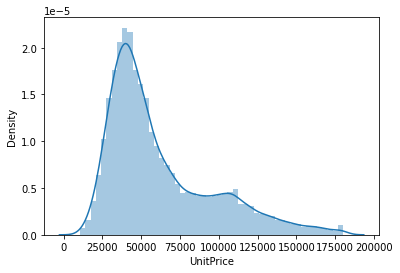

In [51]:
# UnitPrice distribution
sns.distplot(num_data['UnitPrice'])

In [52]:
data['UnitPrice']

0         49934
1        136126
3         59245
6         91953
7         46160
          ...  
38885     82893
38886     38633
38888    105416
38889     67301
38890     19880
Name: UnitPrice, Length: 26341, dtype: int64

In [53]:
np.log(data['UnitPrice'])

0        10.818457
1        11.821336
3        10.989437
6        11.429033
7        10.739869
           ...    
38885    11.325306
38886    10.561862
38888    11.565670
38889    11.116930
38890     9.897469
Name: UnitPrice, Length: 26341, dtype: float64

/Users/rvickyw/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

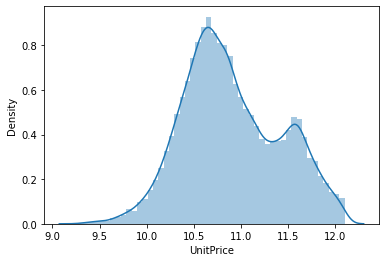

In [54]:
sns.distplot(np.log(data['UnitPrice']))

In [55]:
data.UnitPrice= np.log(data['UnitPrice'])

/Users/rvickyw/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Square', ylabel='Density'>

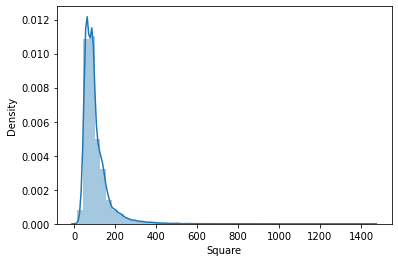

In [56]:
sns.distplot(num_data['Square'])

In [57]:
# Average Price in different district
grouped_means_Dis=data.groupby(['District']).mean()
grouped_means_Dis

,TotalPrice,UnitPrice,Bedroom,Livingroom,Kitchen,Bathroom,Square,TotalFloor,ConstructionTime,Elevator/Stairs,Householder(per floor),Elevator
District,,,,,,,,,,,,
changping,552.339940,10.666909,2.750969,1.427402,1.010340,1.661784,126.787557,9.937096,17.874192,1.264972,3.096079,0.423093
chaoyang,648.044076,11.129923,2.103791,1.155450,1.001896,1.258768,89.908303,15.946445,22.461137,1.841706,5.090047,0.717536
daxing,497.074707,10.650120,2.557606,1.380738,1.006751,1.478848,109.707304,10.349685,16.603510,1.299280,3.074707,0.515752
dongcheng,923.533903,11.591374,2.109984,1.091297,0.996797,1.214629,86.650214,12.097170,25.336893,1.810998,6.332088,0.619327
fangshan,327.065217,10.297239,2.604259,1.356256,1.005324,1.388642,105.627205,9.869565,14.928128,1.199645,2.712955,0.560781
fengtai,460.002369,10.936495,2.111330,1.121595,1.003948,1.168180,78.951638,12.125148,23.329649,1.501777,4.323332,0.488354
haidian,1064.282548,11.486215,2.495845,1.289276,1.007123,1.414721,107.011797,11.468540,24.363277,1.580135,4.656905,0.587258
huairou,388.684848,10.359029,2.739394,1.539394,1.018182,1.484848,121.838909,8.133333,14.715152,1.072727,2.400000,0.339394
mentougou,363.862132,10.504940,2.362132,1.173713,1.002757,1.272059,91.900643,10.200368,20.350184,1.243566,2.930147,0.371324


<AxesSubplot:>

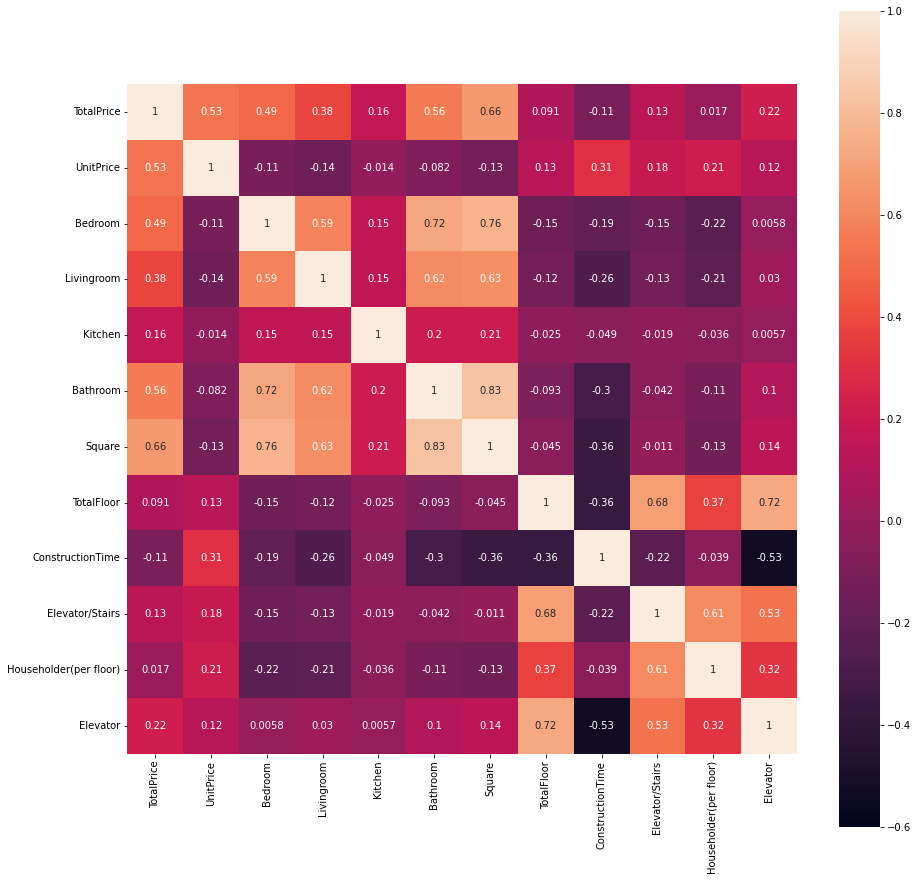

In [58]:
import matplotlib.pyplot as plt
figure, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(num_data.corr(),vmin=-0.6,square=True, annot=True, ax=ax)

## Categorical Variable

In [59]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### RenovationCondition

<AxesSubplot:title={'center':'UnitPrice'}, xlabel='RenovationCondition'>

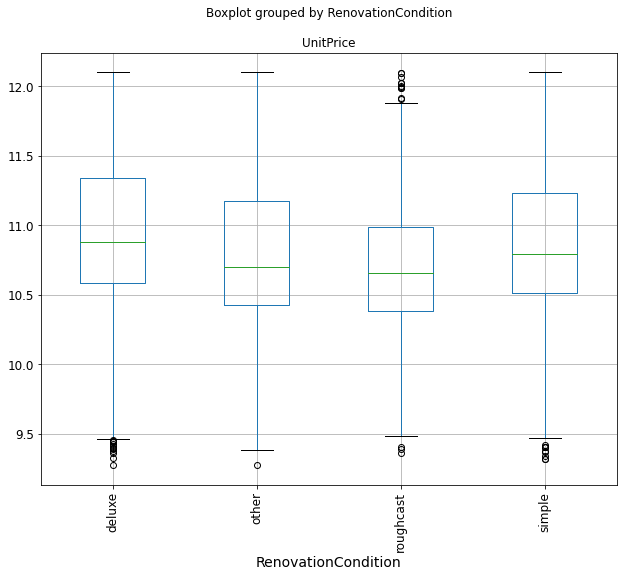

In [60]:
data.boxplot(column = 'UnitPrice', by = 'RenovationCondition', rot = 90, figsize=(10,8))

### Floor

<AxesSubplot:xlabel='Floor', ylabel='Count'>

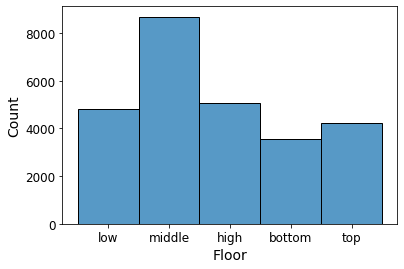

In [61]:
sns.histplot(data.Floor)

In [62]:
data.groupby(['Floor'])

<AxesSubplot:title={'center':'UnitPrice'}, xlabel='Floor'>

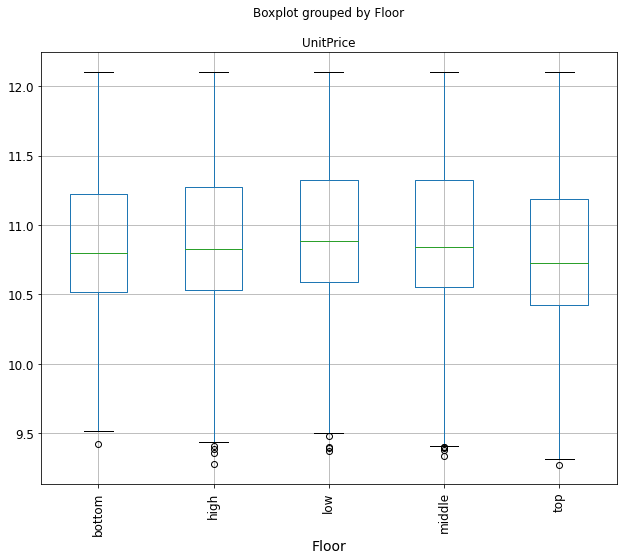

In [63]:
data.boxplot(column = 'UnitPrice', by = 'Floor', rot = 90, figsize=(10,8))

### BulidingOrientation

<AxesSubplot:xlabel='BulidingOrientation', ylabel='Count'>

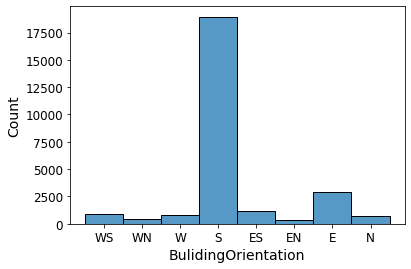

In [64]:
sns.histplot(data.BulidingOrientation)

### District

<AxesSubplot:xlabel='District', ylabel='Count'>

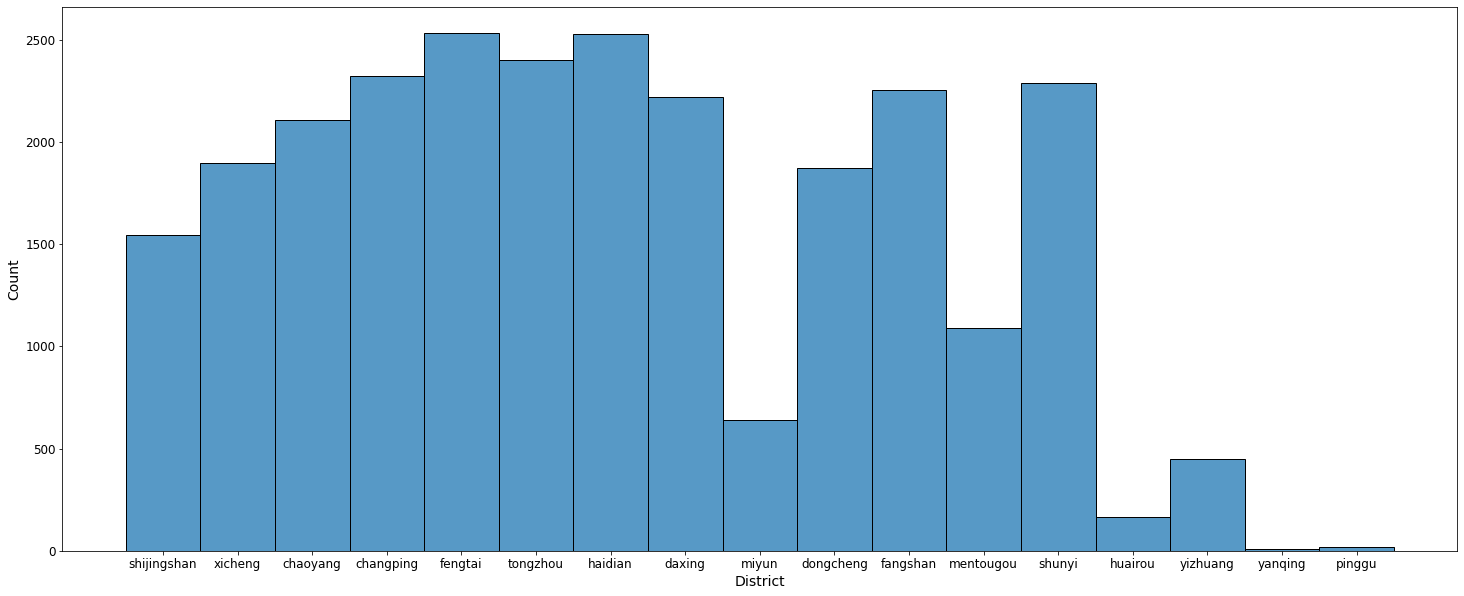

In [65]:
plt.figure(figsize=(25,10))
sns.histplot(data.District)

<AxesSubplot:title={'center':'relationship between TotalPrice and District'}, xlabel='District', ylabel='TotalPrice'>

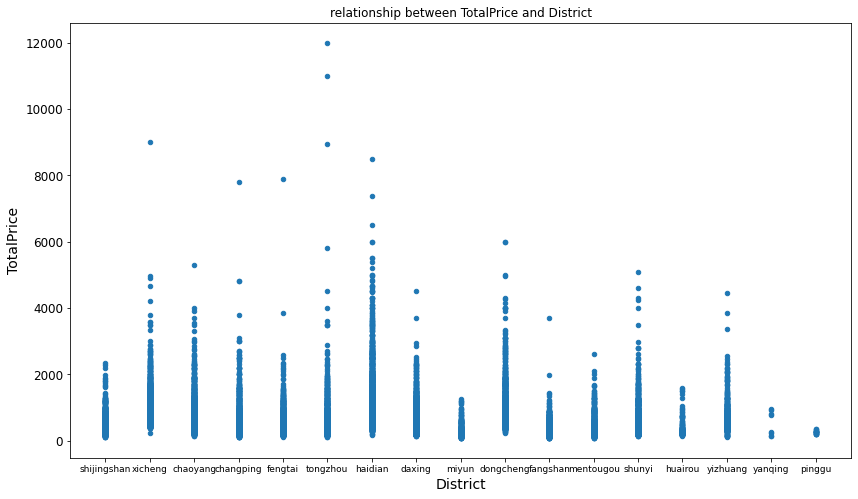

In [66]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=9)
mpl.rc('ytick', labelsize=12)

# Scatter plot 
data.plot(kind = 'scatter', x ='District', y = 'TotalPrice',
                        title = 'relationship between TotalPrice and District', figsize=(14,8))

<AxesSubplot:title={'center':'UnitPrice'}, xlabel='District'>

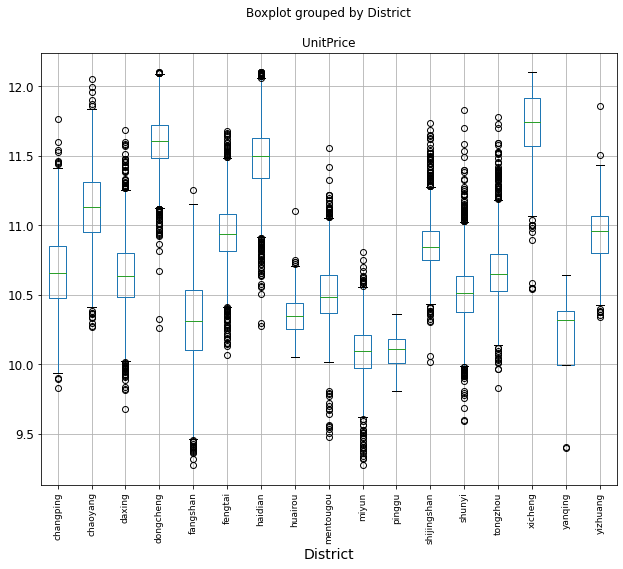

In [67]:
data.boxplot(column = 'UnitPrice', by = 'District', rot = 90, figsize=(10,8))

### RingRoad

<AxesSubplot:xlabel='RingRoad', ylabel='Count'>

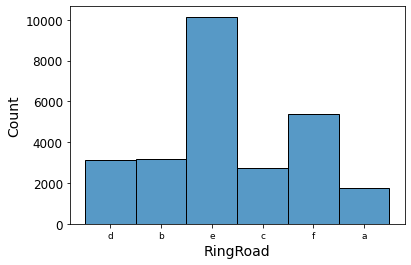

In [68]:
sns.histplot(data.RingRoad)

<AxesSubplot:title={'center':'relationship between TotalPrice and RingRoad'}, xlabel='RingRoad', ylabel='TotalPrice'>

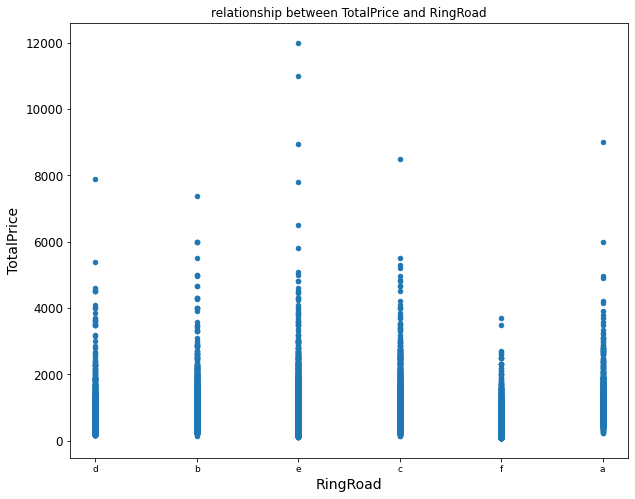

In [69]:
# Scatter plot 
data.plot(kind = 'scatter', x ='RingRoad', y = 'TotalPrice', 
                        title = 'relationship between TotalPrice and RingRoad', figsize=(10,8))

<AxesSubplot:title={'center':'UnitPrice'}, xlabel='RingRoad'>

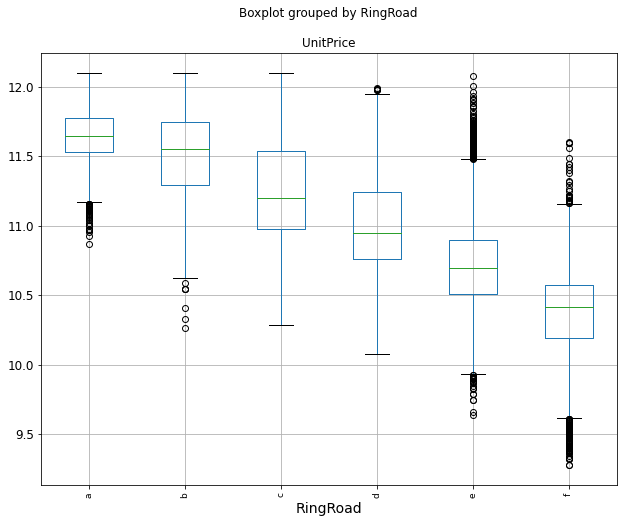

In [70]:
data.boxplot(column = 'UnitPrice', by = 'RingRoad', rot = 90, figsize=(10,8))

### Nearest TR Distance(m)

<AxesSubplot:xlabel='Nearest TR Distance(m)', ylabel='Count'>

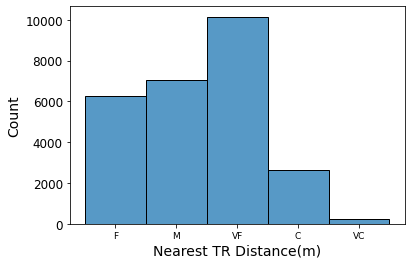

In [71]:
sns.histplot(data['Nearest TR Distance(m)'])

<AxesSubplot:title={'center':'relationship between TotalPrice and Nearest TR Distance(m)'}, xlabel='Nearest TR Distance(m)', ylabel='TotalPrice'>

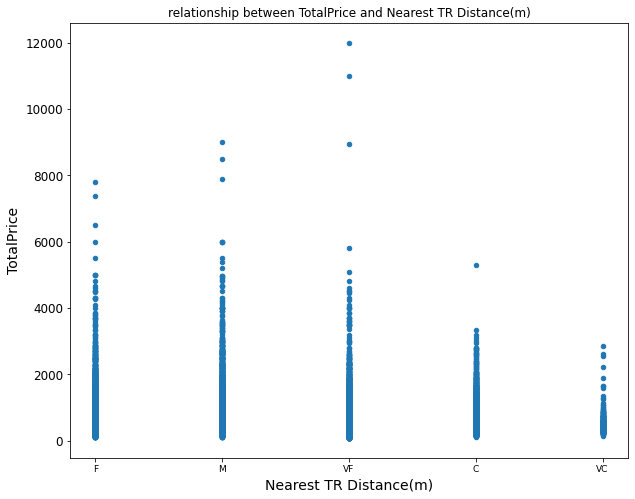

In [72]:
# Scatter plot 
data.plot(kind = 'scatter', x ='Nearest TR Distance(m)', y = 'TotalPrice', 
                        title = 'relationship between TotalPrice and Nearest TR Distance(m)', figsize=(10,8))

<AxesSubplot:title={'center':'UnitPrice'}, xlabel='Nearest TR Distance(m)'>

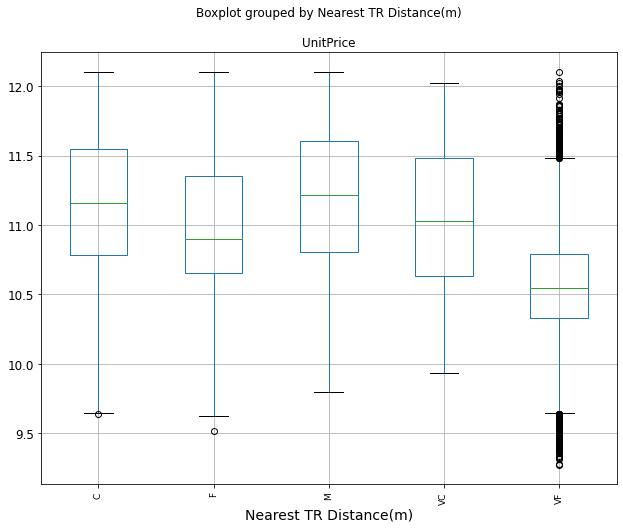

In [73]:
data.boxplot(column = 'UnitPrice', by = 'Nearest TR Distance(m)', rot = 90, figsize=(10,8))

### Building Type

<AxesSubplot:title={'center':'UnitPrice'}, xlabel='BuildingType'>

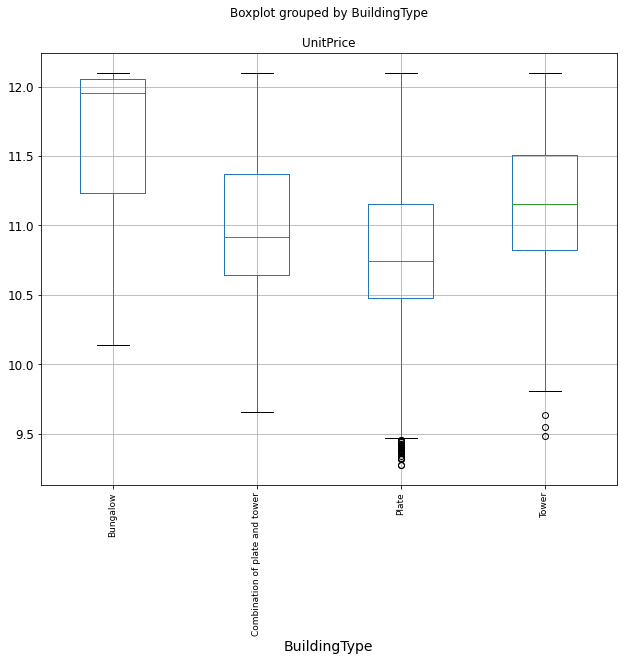

In [74]:
data.boxplot(column = 'UnitPrice', by = 'BuildingType', rot = 90, figsize=(10,8))

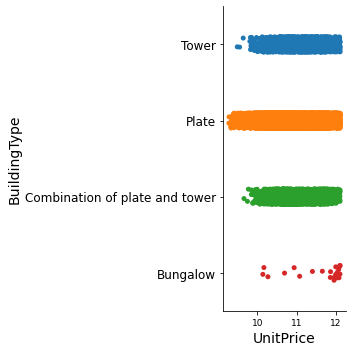

In [75]:
sns.catplot(x="UnitPrice", y="BuildingType", data=data)

### TradingOwnership

<AxesSubplot:title={'center':'UnitPrice'}, xlabel='TradingOwnership'>

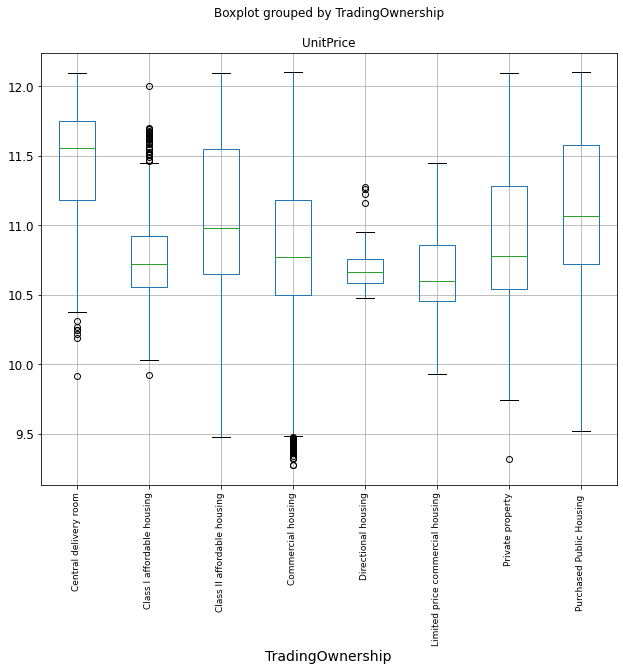

In [76]:
data.boxplot(column = 'UnitPrice', by = 'TradingOwnership', rot = 90, figsize=(10,8))

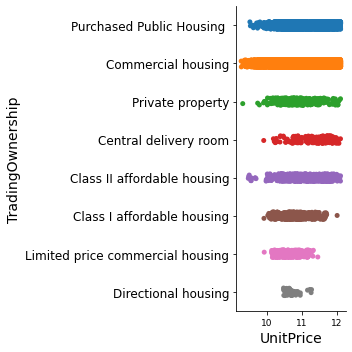

In [77]:
sns.catplot(x="UnitPrice", y="TradingOwnership", data=data)

### Elevator

<AxesSubplot:title={'center':'UnitPrice'}, xlabel='Elevator'>

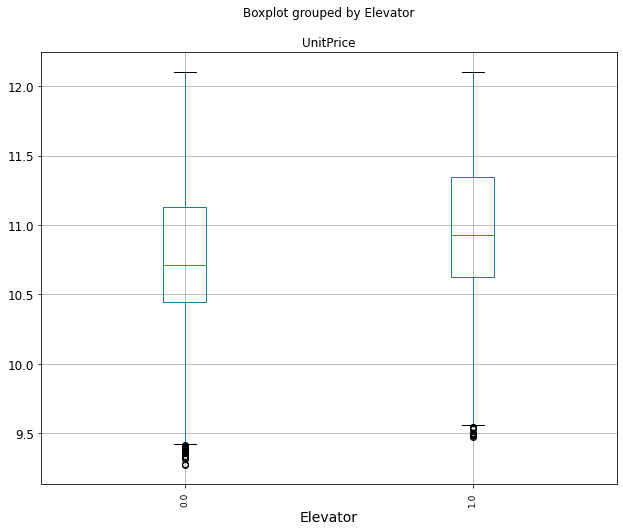

In [78]:
data.boxplot(column = 'UnitPrice', by = 'Elevator', rot = 90, figsize=(10,8))

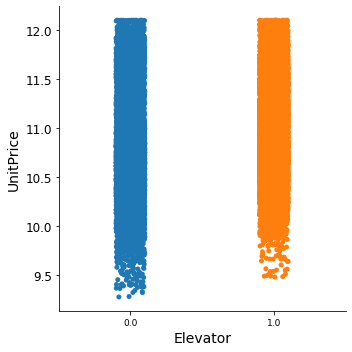

In [79]:
sns.catplot(x="Elevator", y="UnitPrice", data=data)

# Train-Validation-Test Split

In [80]:
# import numpy
import numpy as np

# import train
from sklearn.model_selection import train_test_split

In [81]:
cat_vars=['RenovationCondition','Floor','Elevator','TradingOwnership','BuildingType','District','RingRoad','Nearest TR Distance(m)']

In [82]:
num_vars=['Bedroom','Livingroom','Square','TotalFloor','ConstructionTime','Elevator/Stairs','Householder(per floor)']

In [83]:
# target variable and features
labels = data['UnitPrice']
df=data[cat_vars+num_vars]

# full train data and test data
X_train_full, X_test, y_train_full, y_test = train_test_split(
    df, labels,test_size=0.2, random_state=42)
# train and validation split
train_size = int(np.ceil(X_train_full.shape[0]*0.75)) 
X_train, X_val, y_train, y_val = X_train_full[:train_size], X_train_full[train_size:], y_train_full[:train_size], y_train_full[train_size:]


In [84]:
X_train.shape

(15804, 15)

In [174]:
X_val.shape

(5268, 50)

In [175]:
X_test.shape

(5269, 50)

# Pipeline

In [85]:
# import necessary sklearn packages
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# create the categorical pipeline
cat_pipeline = Pipeline([
    ('1hot', OneHotEncoder(drop='first'))])

# create the numerical pipeline
num_pipeline = Pipeline([
    ('scaler',StandardScaler())
])
    
# combine to form the pre-processing pipeline
full_pipeline = ColumnTransformer([
    ('cat', cat_pipeline, cat_vars),
    ('num', num_pipeline, num_vars)], remainder='drop')

In [86]:
X_train = full_pipeline.fit_transform(X_train)

In [87]:
X_train_full = full_pipeline.transform(X_train_full)
X_val = full_pipeline.transform(X_val)
X_test = full_pipeline.transform(X_test)

In [88]:
X_train_full.shape

(21072, 50)

In [89]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [90]:
# Select the Pipeline for the categorical variables
cat_pipeline = full_pipeline.named_transformers_['cat'] # 定位对于categorical的pipeline

# Create a list of dummy features by first looping over the different categorical variables in a list comprehension 
# and selecting categories from 1 to the last (first category is dropped)
# This returns is a list of arrays, which can first be concatenated and then converted to a list
dummy_features = list(np.concatenate([cat[1:] for cat in cat_pipeline[-1].categories_]))

# We can now calculate the number of dummies for categorical variables
n_dummies = len(dummy_features)

print(n_dummies)

43


In [91]:
dummy_features

['other',
 'roughcast',
 'simple',
 'high',
 'low',
 'middle',
 'top',
 1.0,
 'Class I affordable housing',
 'Class II affordable housing',
 'Commercial housing',
 'Directional housing',
 'Limited price commercial housing',
 'Private property',
 'Purchased Public Housing ',
 'Combination of plate and tower',
 'Plate',
 'Tower',
 'chaoyang',
 'daxing',
 'dongcheng',
 'fangshan',
 'fengtai',
 'haidian',
 'huairou',
 'mentougou',
 'miyun',
 'pinggu',
 'shijingshan',
 'shunyi',
 'tongzhou',
 'xicheng',
 'yanqing',
 'yizhuang',
 'b',
 'c',
 'd',
 'e',
 'f',
 'F',
 'M',
 'VC',
 'VF']

# Model

# Linear Regression model

In [92]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
score=lin_reg.score(X_train, y_train)
print('r^2 score %8.3f \n '% score)

r^2 score    0.844 
 


In [93]:
lin_reg.intercept_, lin_reg.coef_

(11.653414756544702,
 array([-0.04942897, -0.05016884, -0.06662372, -0.09208755, -0.08294624,
        -0.06150847, -0.12201848,  0.13071101, -0.18891622, -0.17804878,
        -0.07959862, -0.18483744, -0.20257249, -0.12184569, -0.06434448,
        -0.44911078, -0.40903764, -0.51312308,  0.18407625, -0.03531916,
         0.50579223, -0.41436789,  0.00363067,  0.53694421, -0.07994981,
         0.09972957, -0.3497935 , -0.60692464,  0.07931293, -0.0337101 ,
        -0.08669793,  0.68316044, -0.36101849,  0.22980937,  0.00145344,
        -0.03827303, -0.17796097, -0.32385927, -0.57428367, -0.00761197,
         0.01879563,  0.00513774, -0.1297451 ,  0.02147392,  0.00267854,
        -0.04378239,  0.0041212 , -0.04513481, -0.02606749, -0.00929795]))

In [94]:
# select first five instances
X_trial = X_val[:10]
y_trial = y_val[:10]

# print predictions
print("Predictions:", lin_reg.predict(X_trial))

# print labels
print("Labels:", y_trial)

Predictions: [11.05915691 11.55701495 10.51296583 10.03495169 10.67140269 10.86326162
 10.46512103  9.97717907 11.73947447 11.48633782]
Labels: 4016     10.954624
2765     11.654581
30870    10.513715
15737     9.957028
32082    10.515886
18974    10.995042
10095    10.141401
5160     10.486736
32325    11.488643
24407    11.200746
Name: UnitPrice, dtype: float64


### Performance evaluation

In [95]:
#import the metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

# prediction on the train set
y_train_predict = lin_reg.predict(X_train)

print('TRAIN - R2', r2_score(y_train, y_train_predict),
      'RMSE', np.sqrt(mean_squared_error(y_train, y_train_predict)), 
      'MAPE', mean_absolute_percentage_error(y_train, y_train_predict))    

# prediction on the validation set
y_val_predict = lin_reg.predict(X_val)

print('VAL - R2', r2_score(y_val, y_val_predict),
      'RMSE', np.sqrt(mean_squared_error(y_val, y_val_predict)), 
      'MAPE', mean_absolute_percentage_error(y_val, y_val_predict))   

TRAIN - R2 0.8437809981670615 RMSE 0.20391634055488567 MAPE 0.014259276601139723
VAL - R2 0.8501753556018714 RMSE 0.199330235216714 MAPE 0.013951138338154588


In [96]:
# check the type of X_train
type(X_train)

scipy.sparse.csr.csr_matrix

In [97]:
# Select the Pipeline for the categorical variables
cat_pipeline = full_pipeline.named_transformers_["cat"]

# Create a list of dummy features by first looping over the different categorical variables in a list comprehension 
# and selecting categories from 1 to the last (first category is dropped)
# This returns is a list of arrays, which can first be concatenated and then converted to a list
dummy_features = list(np.concatenate([cat_var[1:] for cat_var in cat_pipeline[-1].categories_]))

# We can now calculate the number of dummies for categorical variables
n_dummies = len(dummy_features)

print(n_dummies)

43


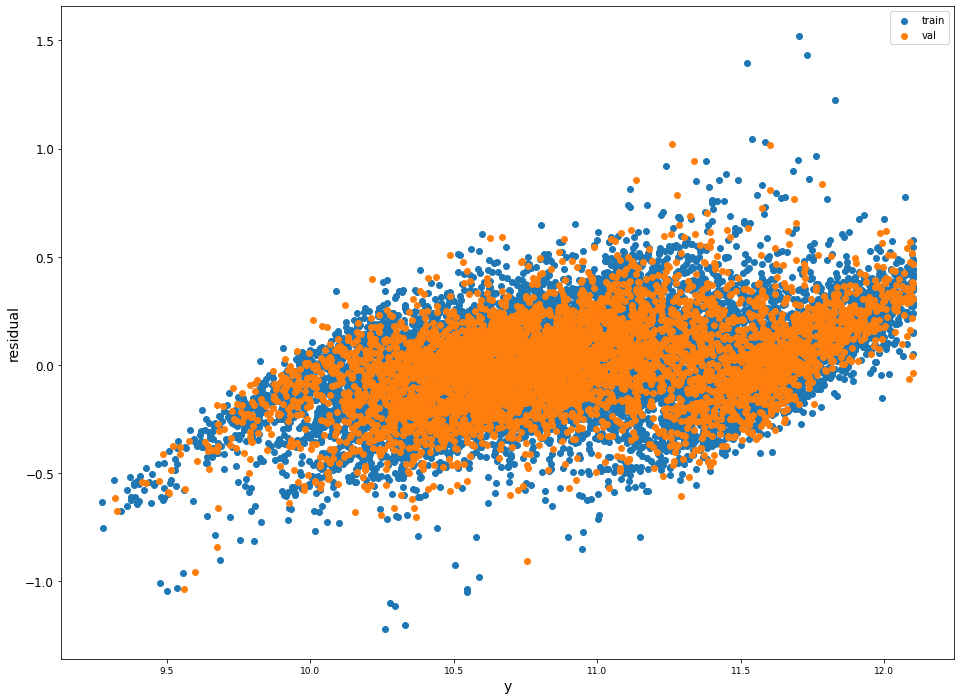

In [98]:
# Create a multi-plot of two columns
fig, ax1 = plt.subplots(ncols=1, figsize=(16, 12))

#  plot residuals against the UnitPrice
ax1.scatter(y_train, y_train - y_train_predict, label='train')
ax1.scatter(y_val, y_val- y_val_predict, label='val')
ax1.set_xlabel('y')
ax1.set_ylabel('residual')
ax1.legend()

plt.show()

In [99]:
y_train_full.mean(), y_train_full.std(), y_train_full.min(), y_train_full.max(), y_train_full.median()

(10.893637212406299,
 0.5157024074810429,
 9.274066062856727,
 12.100712129872347,
 10.819088046200655)

In [100]:
y_train_full_pred = lin_reg.predict(X_train_full)
y_train_full_pred.mean(), y_train_full_pred.std(), y_train_full_pred.min(), y_train_full_pred.max()

(10.893387536467715, 0.4733433198269034, 9.74930042444513, 12.151863506884084)

In [101]:
# cross validation
from sklearn.model_selection import cross_val_score
linear_regression_scores = np.sqrt(-cross_val_score(lin_reg, X_train_full, y_train_full, 
                                                    scoring="neg_mean_squared_error", cv=5))
print("Linear regression: mean", linear_regression_scores.mean(), "sd:", linear_regression_scores.std())

Linear regression: mean 0.20336741887057083 sd: 0.0050599923683949275


In [102]:
linear_regression_r2 = cross_val_score(lin_reg,X_train_full,y_train_full,
                                                cv=5,scoring='r2')
print("Linear regression: mean", linear_regression_r2.mean(), "sd:", linear_regression_r2.std())

Linear regression: mean 0.8443565165397331 sd: 0.007285418252506586


# Random Forest

### Defualt

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
forest=RandomForestRegressor(random_state=42)

In [105]:
forest.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [106]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [107]:
forest.fit(X_train,y_train)
train_pred=forest.predict(X_train)
print('RandomForest Train -  MSE:',mean_squared_error(y_train,train_pred),
      'RMSE:',np.sqrt(mean_squared_error(y_train,train_pred)),
      'MAPE',mean_absolute_percentage_error(y_train,train_pred),
      'R2 Score : ', r2_score(y_train,train_pred))

RandomForest Train -  MSE: 0.003158745451478589 RMSE: 0.05620271747414522 MAPE 0.0036953833488824993 R2 Score :  0.9881329046852603


In [108]:
val_pred=forest.predict(X_val)
print('Valid RandomForest -  MSE:',mean_squared_error(y_val,val_pred),
      'RMSE:',np.sqrt(mean_squared_error(y_val,val_pred)),
      'MAPE',mean_absolute_percentage_error(y_val,val_pred),
      'R2 Score : ', r2_score(y_val,val_pred))

Valid RandomForest -  MSE: 0.02126532119712664 RMSE: 0.14582633917480972 MAPE 0.009754634155314326 R2 Score :  0.9198120992983219


In [109]:
y_train.mean(), y_train.std(), y_train.min(), y_train.max(), y_train.median()

(10.892302715761225,
 0.5159395730502118,
 9.274066062856727,
 12.100712129872347,
 10.816041310159997)

In [110]:
train_full_pred=pd.Series(forest.predict(X_train_full))
train_full_pred.mean(), train_full_pred.std(), train_full_pred.min(), train_full_pred.max(), train_full_pred.median()

(10.89423458544761,
 0.5003506933754133,
 9.39212173165432,
 12.074224859690482,
 10.818026733026334)

In [111]:
train_pred

array([10.42856035, 10.53693794, 10.85383266, ..., 11.61819468,
       10.32361385, 11.61891912])

overfitting

### Hyperparameter tuning

### GridSearch

In [112]:
# number of features to consider at every split
max_features=['auto','sqrt',"log2"]
# maximum number of levels in tree
max_depth=[5,7,None]
# method of selecting samples for training each tree
bootstrap=[True,False]

In [113]:
param_grid1={'max_features':max_features,
           'max_depth':max_depth,
           'bootstrap':bootstrap}
print(param_grid1)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 7, None], 'bootstrap': [True, False]}


In [114]:
forest=RandomForestRegressor()

In [115]:
from sklearn.model_selection import GridSearchCV
forest_Grid1=GridSearchCV(estimator=forest, param_grid=param_grid1, cv=5,verbose=2,n_jobs=4)

In [116]:
forest_Grid1.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 7, None],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=2)

In [117]:
forest_Grid1.best_params_

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto'}

### try more parameters


In [118]:
# number of features to consider at every split
max_features=['auto']
# maximum number of levels in tree
max_depth=[None]
# method of selecting samples for training each tree
bootstrap=[True]
# number of trees in random forest
n=[int(x) for x in np.linspace(start=10, stop = 100, num=4)]
# minimum number of samples required to split a node
min_samples_split=[10,100]
# minimum number of samples requied at each leaf node
min_samples_leaf=[10,100]

In [119]:
param_grid2={'n_estimators': n,
           'max_features':max_features,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'bootstrap':bootstrap}
print(param_grid2)

{'n_estimators': [10, 40, 70, 100], 'max_features': ['auto'], 'max_depth': [None], 'min_samples_split': [10, 100], 'min_samples_leaf': [10, 100], 'bootstrap': [True]}


In [120]:
forest=RandomForestRegressor()

In [121]:
from sklearn.model_selection import GridSearchCV
forest_Grid2=GridSearchCV(estimator=forest, param_grid=param_grid2, cv=5,verbose=2,n_jobs=4)

In [122]:
forest_Grid2.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True], 'max_depth': [None],
                         'max_features': ['auto'],
                         'min_samples_leaf': [10, 100],
                         'min_samples_split': [10, 100],
                         'n_estimators': [10, 40, 70, 100]},
             verbose=2)

In [123]:
forest_Grid2.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 100}

In [124]:
gs_final_model=forest_Grid2.best_estimator_

In [125]:
tr_grid_pred=gs_final_model.predict(X_train)
print('Train RandomForest -  MSE:',mean_squared_error(y_train,tr_grid_pred),
      'RMSE:',np.sqrt(mean_squared_error(y_train,tr_grid_pred)),
      'MAPE',mean_absolute_percentage_error(y_train,tr_grid_pred),
      'R2 Score : ', r2_score(y_train,tr_grid_pred))

Train RandomForest -  MSE: 0.019586483184102343 RMSE: 0.13995171733173675 MAPE 0.009388037349452401 R2 Score :  0.9264155132483096


In [126]:
val_grid_pred=gs_final_model.predict(X_val)
print('Valid RandomForest -  MSE:',mean_squared_error(y_val,val_grid_pred),
      'RMSE:',np.sqrt(mean_squared_error(y_val,val_grid_pred)),
      'MAPE',mean_absolute_percentage_error(y_val,val_grid_pred),
      'R2 Score : ', r2_score(y_val,val_grid_pred))

Valid RandomForest -  MSE: 0.025828769908719795 RMSE: 0.16071331590356722 MAPE 0.010945742417860362 R2 Score :  0.9026041122310078


### best model residual plot

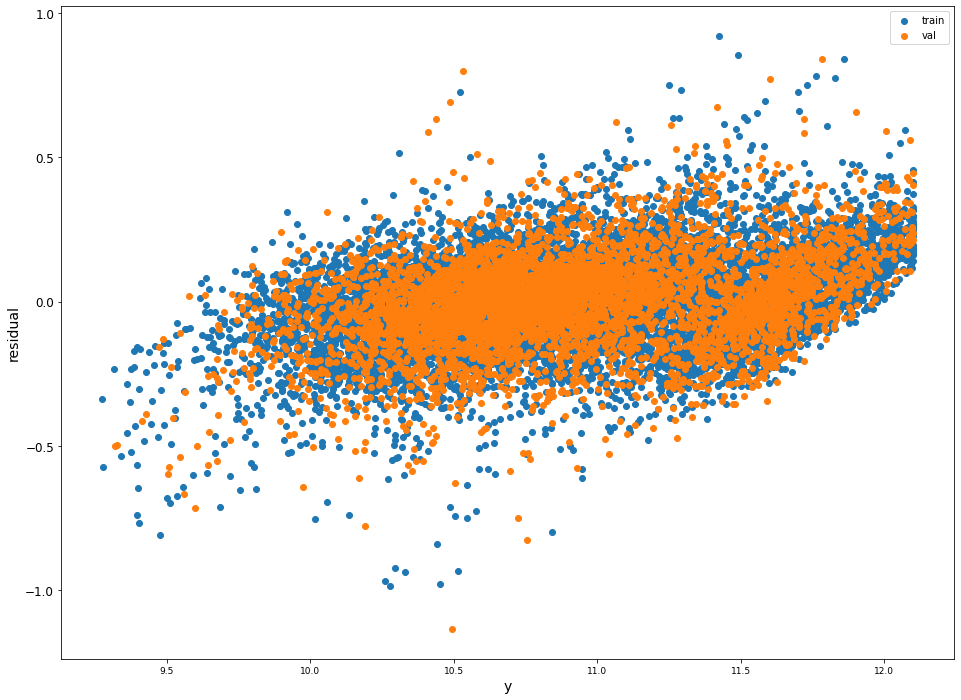

In [127]:
# Create a multi-plot of two columns
fig, ax1 = plt.subplots(ncols=1, figsize=(16, 12))

# On the right, plot residuals against the unit sales
ax1.scatter(y_train, y_train - tr_grid_pred, label='train')
ax1.scatter(y_val, y_val- val_grid_pred, label='val')
ax1.set_xlabel('y')
ax1.set_ylabel('residual')
ax1.legend()

plt.show()

### Cross Validation

In [128]:
from sklearn.model_selection import cross_val_score

In [129]:
random_forest_scores = np.sqrt(-cross_val_score(gs_final_model,X_train_full,y_train_full,
                                                cv=5,scoring='neg_mean_squared_error'))
print("Random Forest: mean", random_forest_scores.mean(), "sd:", random_forest_scores.std())

Random Forest: mean 0.1621745954274026 sd: 0.0032285524837089474


In [130]:
random_forest_r2 = cross_val_score(gs_final_model,X_train_full,y_train_full,
                                                cv=5,scoring='r2')
print("Random Forest: mean", random_forest_r2.mean(), "sd:", random_forest_r2.std())

Random Forest: mean 0.9010870750608184 sd: 0.0036316750531357393


# SVM (Support Vector Machine)

In [131]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

## Compare linear_svm and rbf_svm

In [132]:
# Linear
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(X_train, y_train)

SVR(kernel='linear')

In [133]:
# rbf
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(X_train, y_train)

SVR()

In [134]:
## RBF gives better predictions
print("RMSE for linear SVR:",np.sqrt(mean_squared_error(y_val,svr_linear.predict(X_val))))
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(y_val,svr_rbf.predict(X_val))))

RMSE for linear SVR: 0.19954505762409433
RMSE for RBF kernelized SVR: 0.16087998801211878


## Use rbf kernelized SVM

In [135]:
## predict on train set
svr_rbf.fit(X_train,y_train)
train_pred1=svr_rbf.predict(X_train)
print('Train SVR -  MSE:',mean_squared_error(y_train,train_pred1),
      'RMSE:',np.sqrt(mean_squared_error(y_train,train_pred1)),
      'MAPE',mean_absolute_percentage_error(y_train,train_pred1),
      'R2 Score : ', r2_score(y_train,train_pred1))

Train SVR -  MSE: 0.017844270851181194 RMSE: 0.13358244963759722 MAPE 0.009226490977042492 R2 Score :  0.9329608332593324


In [136]:
## predict on validation set
val_pred1=svr_rbf.predict(X_val)
print('Valid SVR -  MSE:',mean_squared_error(y_val,val_pred1),
      'RMSE:',np.sqrt(mean_squared_error(y_val,val_pred1)),
      'MAPE',mean_absolute_percentage_error(y_val,val_pred1),
      'R2 Score : ', r2_score(y_val,val_pred1))

Valid SVR -  MSE: 0.02588237054277948 RMSE: 0.16087998801211878 MAPE 0.011038951450850366 R2 Score :  0.9024019933783612


In [137]:
y_train.mean(), y_train.std(), y_train.min(), y_train.max(), y_train.median()

(10.892302715761225,
 0.5159395730502118,
 9.274066062856727,
 12.100712129872347,
 10.816041310159997)

In [138]:
train_full_pred=pd.Series(svr_rbf.predict(X_train_full))
train_full_pred.mean(), train_full_pred.std(), train_full_pred.min(), train_full_pred.max(), train_full_pred.median()

(10.893204930513807,
 0.48824879875285404,
 9.460612736772829,
 12.063492168695916,
 10.812944357166904)

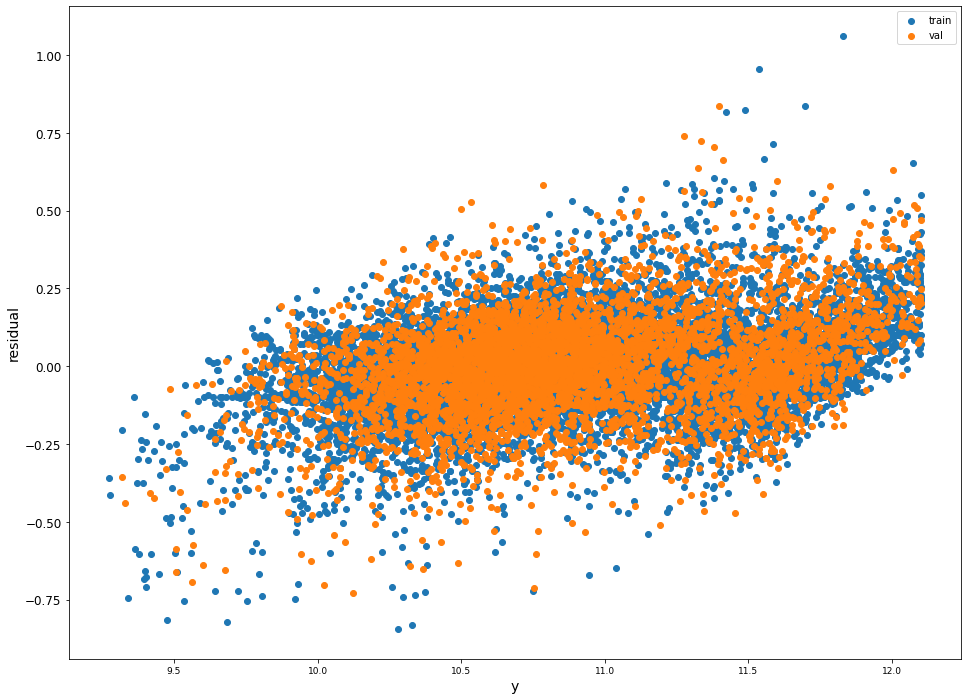

In [139]:
# Create a multi-plot of two columns
fig, ax1 = plt.subplots(ncols=1, figsize=(16, 12))

#  plot residuals against the UnitPrice
ax1.scatter(y_train, y_train - train_pred1, label='train')
ax1.scatter(y_val, y_val - val_pred1, label='val')
ax1.set_xlabel('y')
ax1.set_ylabel('residual')
ax1.legend()

plt.show()

## GridSearch

In [140]:
## grid search of hyperparameters (with 5-fold cross-validation) to see if the test/validation score be improved
from sklearn.model_selection import GridSearchCV
params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.5,1]}
grid = GridSearchCV(svr_rbf,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END .....bootstrap=True, max_depth=5, max_features=auto; total time=   2.2s
[CV] END .....bootstrap=True, max_depth=5, max_features=auto; total time=   2.4s
[CV] END .....bootstrap=True, max_depth=7, max_features=auto; total time=   4.7s
[CV] END .....bootstrap=True, max_depth=7, max_features=sqrt; total time=   0.8s
[CV] END .....bootstrap=True, max_depth=7, max_features=log2; total time=   0.6s
[CV] END .....bootstrap=True, max_depth=7, max_features=log2; total time=   0.7s
[CV] END ..bootstrap=True, max_depth=None, max_features=auto; total time=  35.4s
[CV] END ..bootstrap=True, max_depth=None, max_features=sqrt; total time=   9.9s
[CV] END ..bootstrap=True, max_depth=None, max_features=sqrt; total time=   9.9s
[CV] END ..bootstrap=True, max_depth=None, max_features=log2; total time=   9.1s
[CV] END ....bootstrap=False, max_depth=5, max_features=auto; total time=   2.6s
[CV] END ....bootstrap=False, max_depth=5, max_

[CV] END .....bootstrap=True, max_depth=5, max_features=auto; total time=   2.3s
[CV] END .....bootstrap=True, max_depth=5, max_features=sqrt; total time=   0.5s
[CV] END .....bootstrap=True, max_depth=5, max_features=log2; total time=   0.4s
[CV] END .....bootstrap=True, max_depth=5, max_features=log2; total time=   0.5s
[CV] END .....bootstrap=True, max_depth=5, max_features=log2; total time=   0.4s
[CV] END .....bootstrap=True, max_depth=7, max_features=auto; total time=   4.7s
[CV] END .....bootstrap=True, max_depth=7, max_features=sqrt; total time=   0.8s
[CV] END .....bootstrap=True, max_depth=7, max_features=sqrt; total time=   0.8s
[CV] END .....bootstrap=True, max_depth=7, max_features=log2; total time=   0.6s
[CV] END ..bootstrap=True, max_depth=None, max_features=auto; total time=  35.3s
[CV] END ..bootstrap=True, max_depth=None, max_features=auto; total time=  35.6s
[CV] END ....bootstrap=False, max_depth=5, max_features=sqrt; total time=   0.5s
[CV] END ....bootstrap=False

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5],
                         'epsilon': [0.1, 0.2, 0.5, 1]},
             return_train_score=True, scoring='r2', verbose=1)

In [141]:
## Check which was deemed best estimator by the grid search
grid.best_estimator_

SVR(C=2)

In [142]:
##  Fit that estimator to the data and see
svr_best = SVR(kernel='rbf',gamma='scale', C=2.0, epsilon=0.1)
svr_best.fit(X_train, y_train)

SVR(C=2.0)

In [143]:
train_pred2=svr_best.predict(X_train)
print('Train SVR_best -  MSE:',mean_squared_error(y_train,train_pred2),
      'RMSE:',np.sqrt(mean_squared_error(y_train,train_pred2)),
      'MAPE',mean_absolute_percentage_error(y_train,train_pred2),
      'R2 Score : ', r2_score(y_train,train_pred2))

Train SVR_best -  MSE: 0.01547346471634898 RMSE: 0.12439238206718681 MAPE 0.008694526522368174 R2 Score :  0.9418677182258478


In [144]:
val_pred2=svr_best.predict(X_val)
print('Valid SVR_best -  MSE:',mean_squared_error(y_val,val_pred2),
      'RMSE:',np.sqrt(mean_squared_error(y_val,val_pred2)),
      'MAPE',mean_absolute_percentage_error(y_val,val_pred2),
      'R2 Score : ', r2_score(y_val,val_pred2))

Valid SVR_best -  MSE: 0.025575612797044785 RMSE: 0.15992377183222256 MAPE 0.01099879842588717 R2 Score :  0.9035587245382821


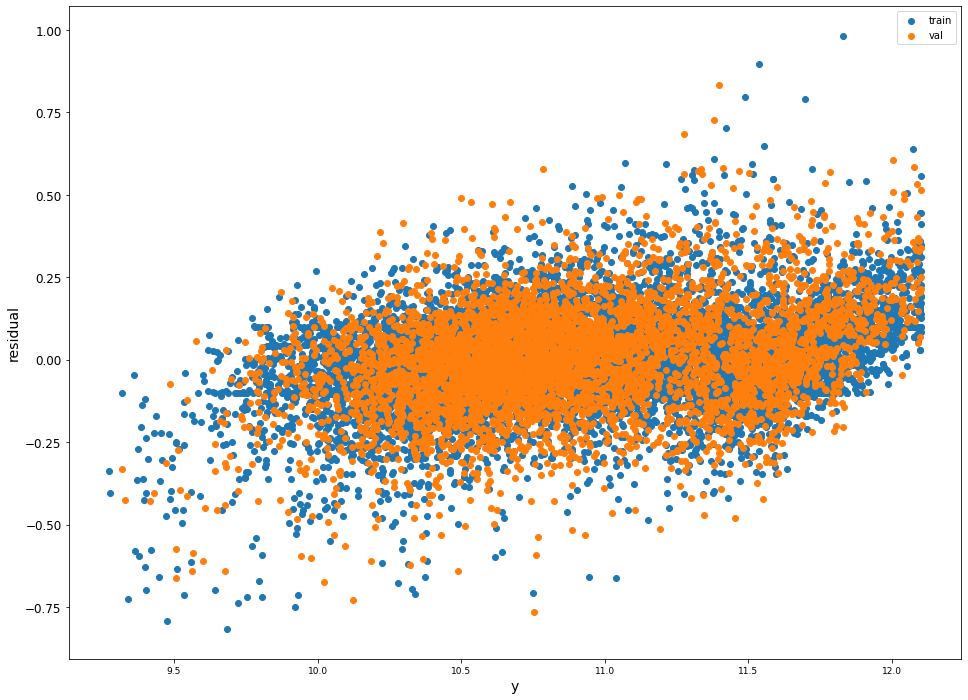

In [145]:
# Create a multi-plot of two columns
fig, ax1 = plt.subplots(ncols=1, figsize=(16, 12))

#  plot residuals against the UnitPrice
ax1.scatter(y_train, y_train - train_pred2, label='train')
ax1.scatter(y_val, y_val - val_pred2, label='val')
ax1.set_xlabel('y')
ax1.set_ylabel('residual')
ax1.legend()

plt.show()

## Evaluation of the final model

## CrossValidation

In [146]:
from sklearn.model_selection import cross_val_score
svr_scores = np.sqrt(-cross_val_score(svr_best,X_train_full,y_train_full,
                                                cv=5,scoring='neg_mean_squared_error'))
print("SVR: mean", svr_scores.mean(), "sd:", svr_scores.std())

SVR: mean 0.16088795211082202 sd: 0.004069564545400471


In [147]:
svr_best_r2 = cross_val_score(svr_best,X_train_full,y_train_full,
                                                cv=5,scoring='r2')
print("SVR: mean", svr_best_r2.mean(), "sd:", svr_best_r2.std())

SVR: mean 0.9025896871895339 sd: 0.004540273326481601


# ANN

In [148]:
#ANN,使用的包为keras，它是一个用Python编写的高级神经网络API。Sequential（）是一个容器，里面所包含的参数解释了这个
#神经网络的结构
model = keras.models.Sequential()

NameError: name 'keras' is not defined

In [ ]:
#Parameters
X_train[1].shape
n_hidden_1 = 400  #隐藏层1，有400个神经元，这是超参后的较好结果
n_hidden_2 = 400  #隐藏层2，有400个神经元，这是超参后的较好结果
n_input =58       #输入神经元数，需要与输入的数据的变量数一样，=x_train[1].shape
n_classes = 1     #输出层，我们要的结果是单位房价这一个变量，所以为1
training_epochs = 100   #迭代世代，表示要训练多少个世代，不是越久越好，需要不断试验
batch_size = 6000       #每次从测试数据中随机取出多少数据进行训练

In [ ]:
#Neural layer
model.add(Dense(n_hidden_1, activation='relu', input_dim=n_input)) #配置第一个隐藏层，有400个神经元，激活函数relu，这是回归常用的激活函数，输入数为58
model.add(Dense(n_hidden_2, activation='relu'))#配置第一个隐藏层，有400个神经元，激活函数relu，这是回归常用的激活函数
model.add(Dense(n_classes)) #最后一层，输出层，没有激活函数，是一个线性层，因为会限制输出范围

In [ ]:
model.summary() #构建的网络的总览
model.compile(loss='mae', optimizer='adam', metrics=[r2, 'mse']) #损失函数mae，
#优化器选择了adam，这是一个比较好的自适应学习率的优化器，metrics评估标准，用这个来评估模型的准确度

In [ ]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=training_epochs, shuffle=True, 
                    validation_data=(X_val, y_val)) #开始训练，验证集用x_val, y_val交叉验证

In [ ]:
#超参数，超参数就是对隐藏层数量，隐藏层神经元数，training_epochs，batch_size不断实验，观察预测精度，得到较好的参数
def ann(n_hidden_1, n_hidden_2,training_epochs,batch_size):
    model.add(Dense(n_hidden_1, activation='relu', input_dim=58)) 
    model.add(Dense(n_hidden_2, activation='relu'))
    model.add(Dense(1)) 
    model.compile(loss='mae', optimizer='adam', metrics=[r2,'mse'])
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=training_epochs, shuffle=True, 
                        validation_data=(X_val, y_val))


In [ ]:
#epochs
ann(400,400,100,6000)
ann(400,400,50,6000)
ann(400,400,200,6000)
#batch_size
ann(400,400,100,6000)
ann(400,400,100,5000)
ann(400,400,100,2000)
ann(400,400,100,10000)
#Neurons
ann(300,300,100,2000)
ann(500,500,100,2000)

In [ ]:
#Hidden layer, 3 layers
model = keras.models.Sequential()

#Parameters
X_train[1].shape
n_hidden_1 = 400  
n_hidden_2 = 400 
n_hidden_3 = 400
n_input =58       
n_classes = 1     
training_epochs = 100   
batch_size = 6000

#Neural layer
model.add(Dense(n_hidden_1, activation='relu', input_dim=n_input)) 
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_hidden_3, activation='relu'))
model.add(Dense(n_classes))

model.summary() 
model.compile(loss='mae', optimizer='adam', metrics=[r2,'mse']) 

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=training_epochs, shuffle=True, 
                    validation_data=(X_val, y_val)) 

In [ ]:
#1 layer
model = keras.models.Sequential()

#Parameters
X_train[1].shape
n_hidden_1 = 400  
n_input =58       
n_classes = 1     
training_epochs = 100   
batch_size = 6000

#Neural layer
model.add(Dense(n_hidden_1, activation='relu', input_dim=n_input)) 
model.add(Dense(n_classes))

model.summary() 
model.compile(loss='mae', optimizer='adam', metrics=[r2,'mse']) 

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=training_epochs, shuffle=True, 
                    validation_data=(X_val, y_val)) 


# Best Model SVM in test data

In [149]:
final_predictions = svr_best.predict(X_test)
print('Test SVR_best -  MSE:',mean_squared_error(y_test,final_predictions),
      'RMSE:',np.sqrt(mean_squared_error(y_test,final_predictions)),
      'MAPE',mean_absolute_percentage_error(y_test,final_predictions),
      'R2 Score : ', r2_score(y_test,final_predictions))

Test SVR_best -  MSE: 0.025793834972170745 RMSE: 0.16060459200213031 MAPE 0.011049775964136956 R2 Score :  0.9025744605919476


In [150]:
y_test.mean(), y_test.std(), y_test.min(), y_test.max(), y_test.median()

(10.914585462623705,
 0.5145916858197649,
 9.408207140105599,
 12.100712129872347,
 10.837126922744897)

In [151]:
test_pred=pd.Series(final_predictions)
test_pred.mean(),test_pred.std(), test_pred.min(), test_pred.max(), test_pred.median()

(10.909114082841826,
 0.4890056744176814,
 9.557088690555208,
 12.040044071999963,
 10.83411741508143)

# Business Problem

### Noise simulation - PreditionPrice&FairPrice & OfferPrice

In [152]:
# Change all Price to Real Price
import math
from math import e
# the real Prediction Price of test dataset
PredictionPrice = e**final_predictions
# the real y_test Price
FairPrice = e**y_test

In [153]:
### Simulate noise to get OfferPrice
# generate randomlist
# random number - 0.5 to simulate +/- fluctuations
import random
randomlist = []
for i in range(0,5269):
    n = random.random()
    n1 = n-0.5
    randomlist.append(n1)

In [154]:
print(randomlist[:20])

[0.02409911151850519, -0.38505183357864814, 0.14326118597079285, 0.3040288735554788, -0.21044767210784177, 0.07358194458006195, 0.21605302800509107, 0.4773061050509676, 0.17473142536302688, -0.36858206163866636, 0.34297419052586675, -0.42080470906953293, -0.40286720351742267, 0.42049503208151817, -0.14722709143885104, 0.16793634304470462, 0.15680472995204964, 0.3471908473441728, 0.457353482291024, 0.48982665083143573]


In [155]:
# OfferPrice
OfferPrice = FairPrice + FairPrice * randomlist

In [156]:
ResultDic={'Prediction':PredictionPrice,'Fair':FairPrice,'Offer':OfferPrice}
Result=pd.DataFrame(ResultDic)
Result.describe()

,Prediction,Fair,Offer
count,5269.000000,5269.000000,5269.000000
mean,61790.224612,62955.025242,62825.319936
std,31980.894722,34616.981747,40604.419853
min,14144.606871,12188.000000,7176.767211
25%,38148.460887,38044.000000,33963.057027
50%,50722.121458,50875.000000,51076.145657
75%,78706.069992,81491.000000,79397.085178
max,169404.406287,180000.000000,267059.479917


### Profit/Loss by the model

In [157]:
Result['ActualProfit/Loss']=Result.Fair-Result.Offer
Result['PredictProfit/Loss']=Result.Prediction-Result.Offer
# According the model to choose which one can be bought
# OfferPrice < PredictionPrice means profitable
Decision=Result[Result.Offer-Result.Prediction<0]
Decision

,Prediction,Fair,Offer,ActualProfit/Loss,PredictProfit/Loss
2147,26131.418160,27616.0,16982.408564,10633.591436,9149.009596
20615,126035.105279,125366.0,98983.017139,26382.982861,27052.088140
36253,106383.208541,118010.0,74513.630906,43496.369094,31869.577635
37385,57707.651035,57690.0,33413.776334,24276.223666,24293.874701
9929,39738.694962,43472.0,25958.556929,17513.443071,13780.138033
...,...,...,...,...,...
17481,57531.667709,61975.0,54586.531487,7388.468513,2945.136223
26980,110524.267835,120834.0,96865.630819,23968.369181,13658.637016
16991,34408.577702,36889.0,32969.883016,3919.116984,1438.694686
22944,37707.951790,41730.0,29163.448341,12566.551659,8544.503449


In [158]:
# Predict Profit
sum(Decision['PredictProfit/Loss'])

44582326.133876935

In [159]:
# Actual Profit by this model
sum(Decision['ActualProfit/Loss'])

38530803.453111045

In [160]:
# the profit of actually profitable houses in decision
sum(Decision[Decision['ActualProfit/Loss']>0]['ActualProfit/Loss'])

40316076.11535529

In [161]:
# the loss of the house that actually offerprice large than its actual value in decision
sum(Decision[Decision['ActualProfit/Loss']<=0]['ActualProfit/Loss'])

-1785272.6622443153

In [162]:
# Prediction error ratio
(sum(Decision['PredictProfit/Loss'])-sum(Decision['ActualProfit/Loss']))/sum(Decision['PredictProfit/Loss'])

0.13573815468025785

In [163]:
# The average predicted profit of each house in decision
sum(Decision['PredictProfit/Loss'])/len(Decision['PredictProfit/Loss'])

16469.274523042826

In [164]:
# The average actuacl profit of each house in decision
sum(Decision['ActualProfit/Loss'])/len(Decision['ActualProfit/Loss'])

14233.76559036241

In [165]:
# If the model is perfect, the profit that we will get.
sum(Result[Result['ActualProfit/Loss']>0]['ActualProfit/Loss'])

42365805.11061107

In [166]:
# The percentage of whole profit that the model can capture
sum(Decision['ActualProfit/Loss'])/sum(Result[Result['ActualProfit/Loss']>0]['ActualProfit/Loss'])

0.9094788439051875